Time series prediction using SARIMA and ARIMA models

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm
import os

In [3]:
#import data
file_path = os.path.join(os.path.expanduser('~'),"AI Workflow Last Module AI in Prod","Capstone","data","cs-train","ts-data","ts-all.csv")
ts_all = pd.read_csv(file_path,parse_dates=['date'],index_col='date')

findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


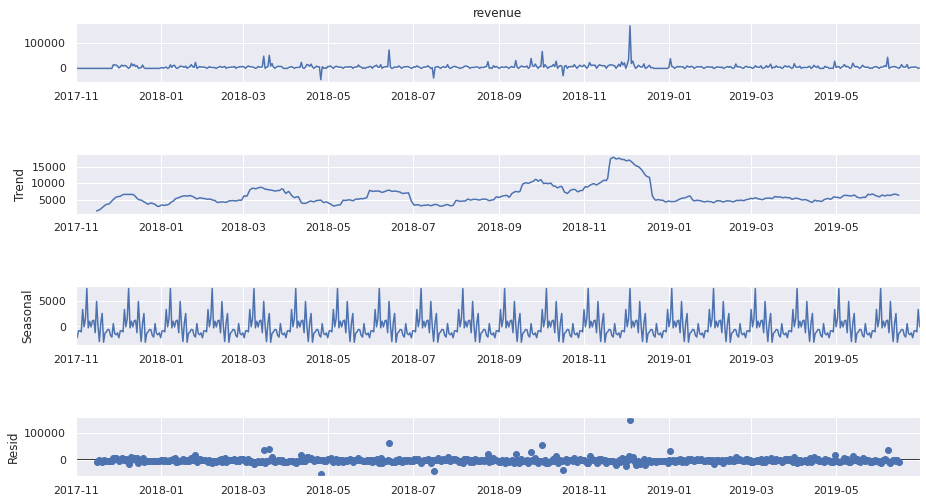

In [4]:
ts_rev_all = ts_all[['revenue']]
res = sm.tsa.seasonal_decompose(ts_rev_all.revenue.dropna(),freq=30)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [19]:
train_start,train_end = '2017-11-01','2019-03-31'
test_start,test_end = '2019-04-01','2019-06-30'
train = ts_rev_all['revenue'][train_start:train_end].dropna()
test = ts_rev_all['revenue'][test_start:test_end].dropna()

In [21]:
train.shape

(516,)

In [22]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(ts_rev_all['revenue'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:1.5710670831376726e-08


In [23]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(ts_rev_all['revenue'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.1209286782493194e-20


It's important to choose carefully a period of the data which will be used in predicting. Because, The results depend on the period.

In [24]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(ts_rev_all['revenue']['2018-01-01':].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:3.5915695876689127e-08


In [25]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(ts_rev_all['revenue']['2018-01-01':].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.4530995461780834e-19


In [26]:
resDiff = sm.tsa.arma_order_select_ic(train, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or c

ARMA(p,q) = (7, 7) is the best.


C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA Model

In [27]:
arima = sm.tsa.statespace.SARIMAX(train,order=(7,1,7),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                revenue   No. Observations:                  516
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -5413.972
Date:                Sun, 20 Sep 2020   AIC                          10857.944
Time:                        17:23:07   BIC                          10921.372
Sample:                    11-01-2017   HQIC                         10882.819
                         - 03-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9137      0.056    -16.370      0.000      -1.023      -0.804
ar.L2         -0.7896      0.061    -12.887      0.000      -0.910      -0.669
ar.L3         -0.9775      0.043    -22.678      0.000      -1.062      -0.893
ar.L4         -0.7865      0.061    -12.839      0.000      -0.907      -0.666
ar.L5         -0.9312      0.061    -15.274      0.000      -1.051      -0.812
ar.L6         -0.8243      0.056    -14.675      0.000      -0.934      -0.714
ar.L7          0.1469      0.043      3.432      0.001       0.063       0.231
ma.L1          0.1083      0.052      2.075      0.038       0.006       0.211
ma.L2         -0.0779      0.056     -1.387      0.165      -0.188       0.032
ma.L3          0.2131      0.054      3.971      0.000       0.108       0.318
ma.L4         -0.1014      0.065     -1.570      0.116      -0.228       0.025
ma.L5          0.1156      0.057      2.032      0.042       0.004       0.227
ma.L6         -0.0547      0.050     -1.097      0.273      -0.152       0.043
ma.L7         -0.9549      0.054    -17.644      0.000      -1.061      -0.849
sigma2      1.205e+08   6.83e-10   1.76e+17      0.000     1.2e+08     1.2e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):            166685.22
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               2.82   Skew:                             6.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        90.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.7e+33. Standard errors may be unstable.
"""

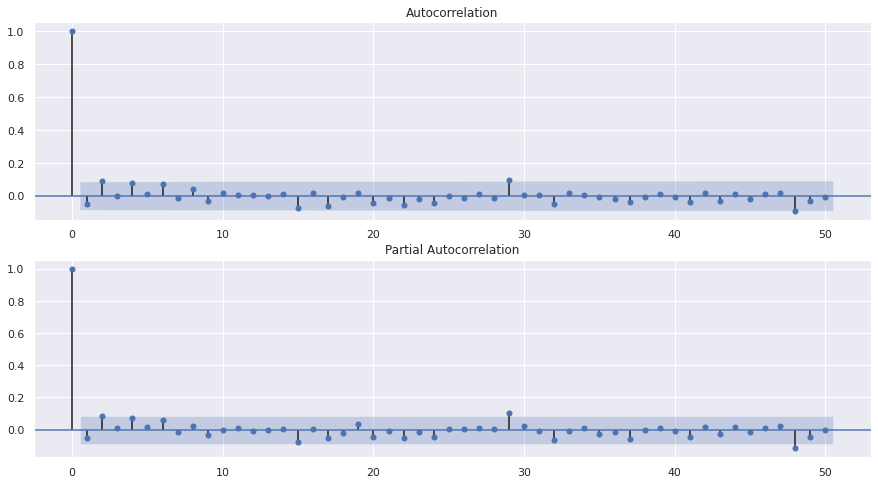

In [28]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(train_end,test_end)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(test,pred)))

ARIMA model MSE:40287469.285418995


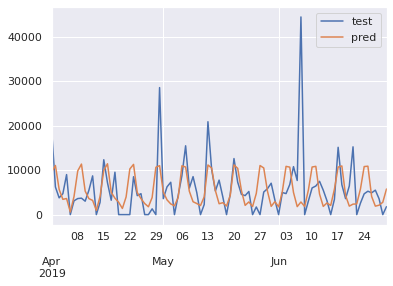

In [30]:
pd.DataFrame({'test':test,'pred':pred}).plot();plt.show()
#new = pd.DataFrame({'test':test,'pred':pred[:]})

SARIMA Model

In [35]:
sarima = sm.tsa.statespace.SARIMAX(train,order=(7,1,2),seasonal_order=(0,1,2,7),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit(disp=False)
sarima.summary()

C:\ProgramData\Anaconda3\envs\myPython36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           revenue   No. Observations:                  516
Model:             SARIMAX(7, 1, 2)x(0, 1, 2, 7)   Log Likelihood               -5281.382
Date:                           Sun, 20 Sep 2020   AIC                          10586.764
Time:                                   17:30:56   BIC                          10637.122
Sample:                               11-01-2017   HQIC                         10606.540
                                    - 03-31-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3071      2.965     -0.104      0.918      -6.118       5.504
ar.L2          0.1460      0.412      0.354      0.723      -0.662       0.954
ar.L3          0.0418      0.314      0.133      0.894      -0.574       0.658
ar.L4          0.0828      0.089      0.933      0.351      -0.091       0.257
ar.L5          0.0208      0.278      0.075      0.940      -0.524       0.566
ar.L6          0.0619      0.112      0.551      0.582      -0.158       0.282
ar.L7         -0.0751      1.208     -0.062      0.950      -2.443       2.293
ma.L1         -0.5400      2.974     -0.182      0.856      -6.369       5.289
ma.L2         -0.4244      2.921     -0.145      0.884      -6.150       5.302
ma.S.L7       -0.8911      1.021     -0.873      0.383      -2.892       1.110
ma.S.L14      -0.0688      0.988     -0.070      0.944      -2.005       1.868
sigma2      1.964e+08   5.01e-07   3.92e+14      0.000    1.96e+08    1.96e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            172855.58
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.94   Skew:                             6.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.83e+31. Standard errors may be unstable.
"""

In [36]:
from sklearn.metrics import mean_squared_error
pred = sarima.predict(train_end,test_end)[1:]
print('SARIMA model MSE:{}'.format(mean_squared_error(test,pred)))

SARIMA model MSE:32745173.75835173


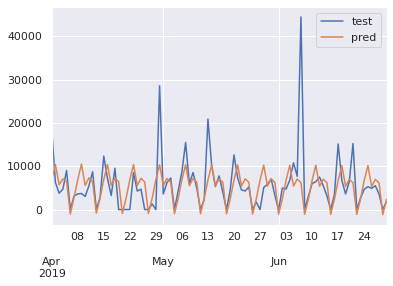

In [38]:
pd.DataFrame({'test':test,'pred':pred}).plot();plt.show()

It seems SARIMA model's prediction is better than ARIMA